# Introduction

In analyzing the happiness dataset, we were trying to understand the relationship between economic, social, and personal factors and the overall score each country received. By looking at the factors that went into the calculation for each country’s happiness score and testing its correlation (via scatter plots and linear regression to find slope/intercept), we were able to find that GDP per capita and healthy life expectancy were the two factors that showed the most linear relationship to each country’s happiness score.

We specifically looked at two research questions to learn more about the relationships between each factor and the happiness score for each country. 

Research question:
1. Are there any linear relationships between factors and the happiness score?
2. If so, how well can we predict actual values? 

Summary of main findings:
- GDP per capita and healthy life expectancy show most linear relationship to country’s happiness score


# Data Description

## What are the observations (rows) and the attributes (columns)?
The data includes 157 observations that are identified as countries in the world. They are analyzed with attributes as follows: Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, and Dystopia Residual. These observations are taken from the year 2019 and 2018 as the data from 2017, 2016 and 2015 have different columns. 

## Why was this dataset created?

The dataset was created in order to assess the well-beings of citizens of different countries and see the correlation with the progress of the nation. Though this started off as a celebration of International Day of Happiness, the report gained traction through the years (2012-present) and has become a reference for world leaders in the economics, public health, and policy area of their country. It helps assess what direction these countries are going toward, and its progress in its overall wellbeing/policies. 

## Who funded the creation of the dataset?

The world happiness data is published by the Sustainable Development Solutions Network at United Nations, and the data is primarily provided by Gallup World Poll.

## What processes might have influenced what data was observed and recorded and what was not?

The world happiness data was created to make a ranking of national happiness for all countries. However, from the data we see that not all countries are included in the dataset. This may be due to situations such as war that makes surveying impossible to conduct. Other reasons may be government regulations, citizens unwilling to answer surveys, or not having enough samples to calculate a score.

## What preprocessing was done, and how did the data come to be in the form that you are using?

The dataset was taken from the GallupWorld Poll whose happiness scores were inspired by the United Nation. The World Happiness Report released by the United Nations ranks 155 countries, and this influenced the production of this dataset. Happiness reports have gained more recognition from the public as more government officials and different organizations use these observations to make certain decisions in economics, psychology, politics, and more. The initial process to determine the data to be observed most likely have been to define what happiness is. The attributes of happiness scores and rankings from this dataset were recorded using data from the Gallup World Poll, which are derived from answers to a life evaluation question known as Cantril ladder. People were asked this Cantril ladder question in a poll they took willingly--though it’s unclear if they knew what their polling results would be used. They were asked to rate their lives on a scale from 0 to 10, where 10 is the best possible life for them. Factors that may influence one’s well-being might have been determined to know what data to observe and record to measure happiness. The data observes mainly six factors - economic production, social support, life expectancy, freedom, absence of corruption, and generosity. Gallup weights were applied to the data that came from the Gallup World Poll, and then compared data to a “benchmark” imaginary country (“Dystopia”)) that had the lowest scores for the 6 major factors of happiness. All of the real country's data were used to compare against Dystopia for a consistent way of measuring the factors of happiness.

The data for 2015, 2016, 2017, 2018, and 2019 had different number of rows and columns. The first preprocessing was to match all the columns of the data from each year. Since 2019 was the most recent one, the data was transformed to match the column names and order of the 2019 data. This preprocessing will allows us to conduce more accurate regression analysis as there will be more data and contatenating the data would be easier. The second preprocessing was to match the list of countries with the 2019 data. While scanning through the data we realized that each year had different number of countries within the data. Therefore, we created another dataset that deleted counries which were not in all datasets.

## Data Source

https://www.kaggle.com/unsdsn/world-happiness#2019.csv

**Potential Problems with Dataset**

The dataset looks at various countries and their happiness in different years.
Attribues (columns) are slightly different in different year databases. For example, some differences include: the order of columns may be different, certain column names are slightly changed, or some year databases are missing some attributes. 

# Data Analysis

We start by importing the necessary libraries to further analyze our cleaned/organized dataset from above: concat_data.csv. This dataset includes all the data from all 5 years, with shared happiness score factors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn')

In [2]:
all_years = pd.read_csv('data/concat_data.csv')
all_years = all_years.drop([489]) # drop because Perceptions of corruption column is NaN
all_years.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,above_10
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,1
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1


Below, we calculate the mean and standard deviation for each of the factors to understand our data more in depth.

In [83]:
for x in range(6):
    mean = round(all_years[all_years.columns[x+3]].mean(), 4)
    std = round(all_years[all_years.columns[x+3]].std(), 4)
    print('Mean of {}: {}'.format(all_years.columns[x+3], mean))
    print('Standard Deviation of {}: {}'.format(all_years.columns[x+3], std))
    print('\n')

Mean of GDP per capita: 0.9145
Standard Deviation of GDP per capita: 0.4054


Mean of Social support: 1.0788
Standard Deviation of Social support: 0.3296


Mean of Healthy life expectancy: 0.6123
Standard Deviation of Healthy life expectancy: 0.2485


Mean of Freedom to make life choices: 0.4113
Standard Deviation of Freedom to make life choices: 0.1529


Mean of Generosity: 0.2186
Standard Deviation of Generosity: 0.1224


Mean of Perceptions of corruption: 0.1254
Standard Deviation of Perceptions of corruption: 0.1058




Below, we have plotted histograms for each factor for the happiness score to better show how data for each category is distributed. 

Histograms for each Factor: Frequency and Distribution of Data


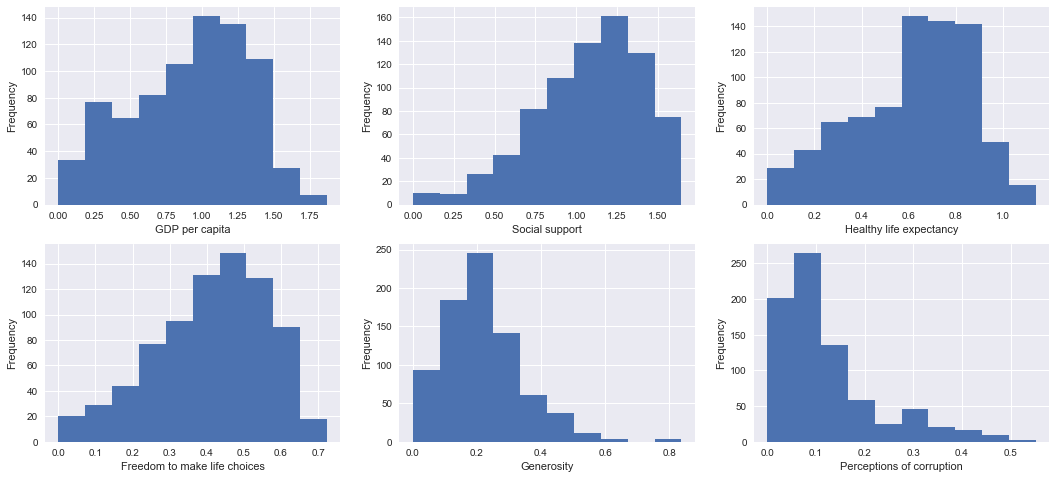

In [33]:
cols = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', \
       'Perceptions of corruption']
print("Histograms for each Factor: Frequency and Distribution of Data")

plt.figure(figsize = (18, 8))
for num in range(len(cols)):
    plt.subplot(2, 3, num+1)
    plt.hist(all_years[cols[num]])
    plt.ylabel('Frequency')
    plt.xlabel(cols[num])

plt.show()

In [34]:
all_years[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,0.914537,1.078780,0.612342,0.411254,0.218618,0.125436
std,0.405403,0.329581,0.248459,0.152911,0.122394,0.105816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.605000,0.870210,0.440060,0.310480,0.130000,0.054000
50%,0.982000,1.125000,0.647239,0.431000,0.202000,0.091000
75%,1.233748,1.328000,0.808000,0.531000,0.279060,0.156030
max,1.870766,1.644000,1.141000,0.724000,0.838075,0.551910


Given the mean, standard deviation, histogram, and distribution of each of these factors, we notice that 'GDP per capita', 'Social support', 'Healthy life expectancy', and 'Freedom to make life choices' seem to have a normal distribution. While 'Generosity' and 'Perceptions of corruption' have distribution looking more similar to geometric distributions.

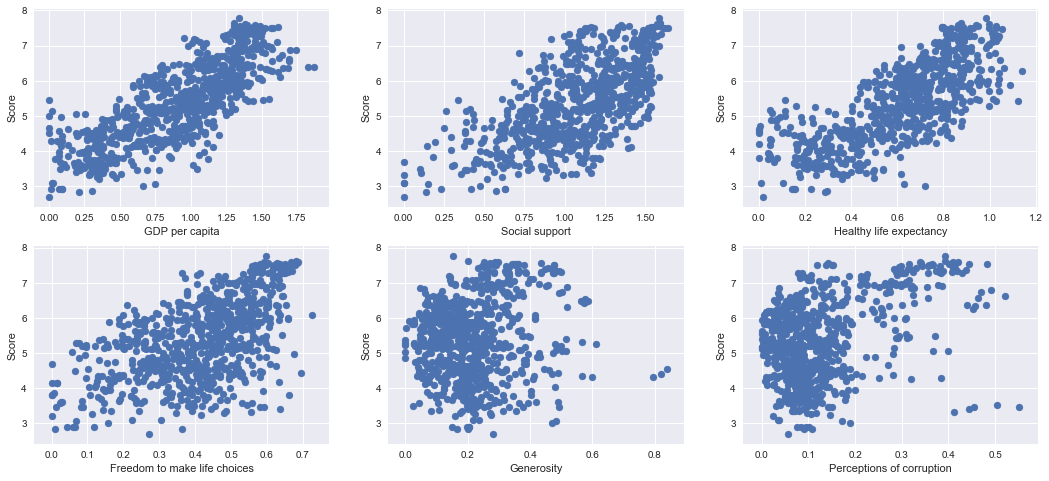

In [4]:
cols = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', \
       'Perceptions of corruption']

plt.figure(figsize = (18, 8))

for num in range(len(cols)):
    plt.subplot(2, 3, num+1)
    plt.scatter(all_years[cols[num]], all_years['Score'])
    plt.ylabel('Score')
    plt.xlabel(cols[num])
    
plt.show()

Above, are the scatter plots for each happiness factor and each country's corresponding happiness score. As you can see, GDP per capita (GDP), Social support (SS), and healthy life expectancy (H) show the greatest linear relationship with the happiness score. After plotting and seeing this relationship, we further analyzed for each factor by calculating its $R^2$ (coefficient of determination) value to test our **hypothesis**: GDP, SS, H show a positive relationship with a country's overall happiness score.  

In [36]:
# get R^2
for var in cols:
    lin_reg = LinearRegression().fit(all_years[[var]], all_years['Score'])
    print("R-squared for {}: {}".format(var, round(lin_reg.score(all_years[[var]], all_years['Score']), 4))) 

R-squared for GDP per capita: 0.6237
R-squared for Social support: 0.4241
R-squared for Healthy life expectancy: 0.5518
R-squared for Freedom to make life choices: 0.3062
R-squared for Generosity: 0.0191
R-squared for Perceptions of corruption: 0.1587


In [35]:
y=all_years['Score']
cols1 = ["Social support", "GDP per capita", "Healthy life expectancy"]
for one in cols1:
    x=all_years[[one]]
    model = LinearRegression().fit(x, y)
    print("{outcome} has slope {slope:.3f} and intercept {intercept:.3f}".format(outcome = one,slope = model.coef_[0],intercept = model.intercept_))

Social support has slope 2.227 and intercept 2.975
GDP per capita has slope 2.196 and intercept 3.369
Healthy life expectancy has slope 3.370 and intercept 3.314


As we had predicted, the $R^2$ values for GDP per capita (GDP), social support(SS), and healthy life expectancy(H) were the largest values (in comparison to Freedom to make life choices, generosity, and perceptions of corruption). Also, the positive slope values we calculated for GDP, H, and SS further validated our hypothesis that GDP, SS, and H showed the most linear relationship with the overall happiness score. 

We then calculated the Mean Square Error for all of the factors. 

In [8]:
# get MSE
from sklearn.metrics import mean_squared_error

for var in cols:
    lin_reg = LinearRegression().fit(all_years[[var]], all_years['Score'])
    mse = mean_squared_error(all_years['Score'], lin_reg.predict(all_years[[var]]))
    print("{}: {}".format(var, round(mse, 4))) 

GDP per capita: 0.4775
Social support: 0.7306
Healthy life expectancy: 0.5686
Freedom to make life choices: 0.8802
Generosity: 1.2445
Perceptions of corruption: 1.0673


Out of all of the factors, GDP, SS, and H all showed the lowest mean squared error--with GDP being the lowest. This means there's less variation in the difference between the actual score and the predicted score, signifying that those factors can predict the overall happiness scores more accurately (using linear regression). GDP and H shows the most promise in how accurately we can calculate the predicted happiness scores based off these two factors.  

In [18]:
X = all_years[['GDP per capita', 'Healthy life expectancy']]
y = all_years['Score']

lin_reg_gdp_h = LinearRegression().fit(X, y)
print('Slope:', lin_reg_gdp_h.coef_)
print('Intercept:', round(lin_reg_gdp_h.intercept_, 4))

Slope: [1.49864797 1.44342922]
Intercept: 3.1228


From the output above, we can find the relationship between happiness score, GDP per capita, and health life expectancy:
$Score = 1.4986GDP + 1.4434H + 3.1228$

To measure the accuracy of the linear regression model above, we plot the residual plot.

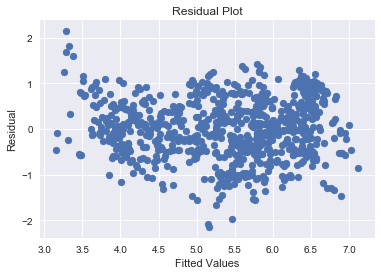

In [20]:
residual = y - lin_reg_gdp_h.predict(X)

plt.scatter(lin_reg_gdp_h.predict(X), residual)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

From the residual plot we see that the deviation between predicted score and the actual score is mostly within 1. Considering that the range of the happiness score is from 0 to 7.77, we can conclude that out prediction is mostly accurate. 

However, since the residual plot shows a curve, a linear model may not be the most appropriate model to prediction the happiness score from GDP per capita and health life expectancy.

Now we see predict the happiness score with GDP per capita.

In [23]:
X = all_years[['GDP per capita']]
y = all_years['Score']

lin_reg_gdp = LinearRegression().fit(X, y)
print('Slope:', round(lin_reg_gdp.coef_[0], 4))
print('Intercept:', round(lin_reg_gdp.intercept_, 4))

Slope: 2.1955
Intercept: 3.3693


From the slope and intercept we can creat the following linear model:
$Score = 2.1955GDP + 3.3693$

Similarly, to measure the accuracy of the linear regression model above, we plot the residual plot.

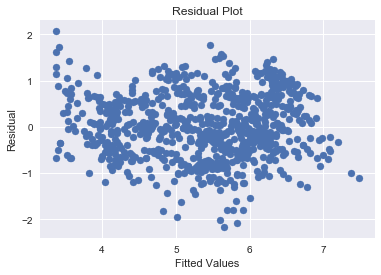

In [24]:
residual = y - lin_reg_gdp.predict(X)

plt.scatter(lin_reg_gdp.predict(X), residual)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

Compared to the residual plot with two variables, the residual plot above shows more points that have deviation greater than 1. Therefore, we can conclude that the model with GDP per capita and healthy life expenctancy is a better model. 

# Evaluation of Significance

In [48]:
import statsmodels.api as sm
import scipy.stats as stats

From the analysis above we can creat the following models:

* $Score = 2.196GDP + 3.369$
* $Score = 3.370H + 3.314$
* $Score = 1.4986GDP + 1.4434H + 3.1228$

$GDP = \text{GDP per capita} \\ H = \text{Health life expectancy}$

We conduct hypothesis testing on the slopes of the model to see if the slopes are significant. We set the significance level to 0.05.

For the first model we can creat the following hypothesis testing: $H_0: \beta_{GDP} = 0 \\ H_A: \beta_{GDP} > 0$

In [81]:
gdp_model = sm.OLS(all_years['Score'], sm.add_constant(all_years['GDP per capita'])).fit()

ts = (gdp_model.params[1] - 0)/gdp_model.bse[1]
df = len(all_years['GDP per capita']) - 2
p_value = stats.t.sf(ts, df)
print('p-value:', p_value)

p-value: 8.854475889734424e-168


Since the p-value is less than the significance level, we reject the null hypothesis. We conclude that the model of happiness score against GDP per capita is significant.

For the second model we can creat the following hypothesis testing: $H_0: \beta_{H} = 0 \\ H_A: \beta_{H} > 0$

In [80]:
happiness_model = sm.OLS(all_years['Score'], sm.add_constant(all_years['Healthy life expectancy'])).fit()

ts = (happiness_model.params[1] - 0)/happiness_model.bse[1]
df = len(all_years['Healthy life expectancy']) - 2
p_value = stats.t.sf(ts, df)
print('p-value:', p_value)

p-value: 3.3583368881098405e-138


Since the p-value is less than the significance level, we reject the null hypothesis. We conclude that the model of happiness score against healthy life expectancy is significant.

For the third model, we conduct an F-test to see where the variables GDP per capita and healthy life expectanct are significant.

$H_0: \beta_{H} = \beta_{GDP} = 0 \\ H_A: \beta_{H} = \beta_{GDP} \neq 0$

In [84]:
X = all_years[['GDP per capita', 'Healthy life expectancy']]
y = all_years['Score']
lin_reg_gdp_h = LinearRegression().fit(X, y)
predict_mean = lin_reg_gdp_h.predict(X).mean()

ssr = sum((lin_reg_gdp_h.predict(X) - predict_mean)**2)
sse = sum((y - lin_reg_gdp_h.predict(X))**2)

msr = ssr / 2
mse = sse / (len(y) - 2 - 1)
ts = msr/mse # get test statistics

p_value = stats.f.cdf(ts, 2, 779)
print('p_value:', 1 - p_value)

p_value: 1.1102230246251565e-16


Since p-value is less than the significance level, we reject the null hypothesis and conclude that at least one predictor explains a significant amount variation in the happiness score.

# Conclusion
From our data analysis findings, our $R^2$ values for all the happiness factors were not as high as we had hoped. Though there were a few factors, such as GDP, H, and SS, that showed higher correlation to the overall happiness score, it was not a perfect indicator that there was a strong linear relationship there. We further tested the mean squared error, noticed that GDP and H had the lowest values, and decided to fit a linear regression model on GDP + H to further test our hypothesis. We then checked how confident we could be with the linear model outcome by plotting the residuals, and concluded that these two variables were not strong enough to predict the outcome of the happiness score. When we plotted residuals with both factors though, it showed a stronger indicator of the happiness score. To create a more accurate model/prediction of a nation's happiness score, more factors would lead to more accurate predictions. 


These findings can help inform public health officials/government officals which area in policy that will most likely positively influence a nation's overall happiness score. This way, nations leaders can make more holistic decisions with these results in mind. It's important for nations to strive to create a happier environment for citizens to live in--with findings on the correlation between these factors and overall happiness score, leaders can better gauge how their decisions are affecting/not affecting different parts of people's lives.

# Source Code

https://github.com/tt0507/info2950_final_project